https://www.kaggle.com/phylake1337/fire-dataset

Context
The dataset was created by my team during the NASA Space Apps Challenge in 2018, the goal was using the dataset to develop a model that can recognize the images with fire.
If you seek more info about the Context or the challenge, then you can visit Our team page.

Content
Data was collected to train a model to distinguish between the images that contain fire (fire images) and regular images (non-fire images), so the whole problem was binary classification.

Data is divided into 2 folders, fireimages folder contains 755 outdoor-fire images some of them contains heavy smoke, the other one is non-fireimages which contain 244 nature images (eg: forest, tree, grass, river, people, foggy forest, lake, animal, road, and waterfall).

Hint: Data is skewed, which means the 2 classes(folders) doesn't have an equal number of samples, so make sure that you have a validation set with an equally-sized number of images per class (eg: 40 images of both fire and non-fire classes).

Acknowledgements
Team Members:
1-Ahmed Gamaleldin: https://www.linkedin.com/in/ahmedgamal1496/
2-Ahmed Atef: https://www.linkedin.com/in/ahmed-atef-a081aa141/
3-Heba Saker: https://www.linkedin.com/in/heba-sakr/
4-Ahmed Shaheen: https://www.linkedin.com/in/ahmed-a-shaheen/

In [1]:
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix

Using TensorFlow backend.


In [2]:
# filename = 'fire.zip'
# archive = ZipFile(filename)
# archive.extractall()
# os.listdir()

In [3]:
fire_path = 'fire_dataset\\fire_images'
non_fire_path = 'fire_dataset\\non_fire_images'
print('Fire images: {}'.format(len(os.listdir(fire_path))))
print('Non-fire images: {}'.format(len(os.listdir(non_fire_path))))

Fire images: 755
Non-fire images: 244


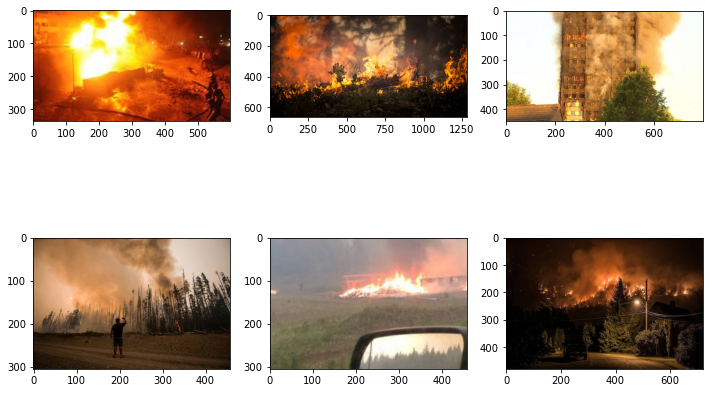

In [4]:
def show_img_example(img_path, n_rows=3, n_cols=2, figsize=(12,8)):
    
    n_rows = 2
    n_cols = 3

    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    for ax in axs.flat:
        img_name = np.random.choice(os.listdir(img_path))
        img = mpimg.imread(os.path.join(img_path, img_name), 0)
        ax.imshow(img)

show_img_example(fire_path)

In [5]:
def load_img(path, size=(220, 220, 3)):
    img = image.load_img(path, target_size=size)
    #convert image to array
    img = image.img_to_array(img)
    return img

fire_imgs = [load_img(os.path.join(fire_path, img)) for img in os.listdir(fire_path) if img.endswith('.png')]
non_fire_imgs = [load_img(os.path.join(non_fire_path, img)) for img in os.listdir(non_fire_path) if img.endswith('.png')]

Note: none_fire_img.189.png is gif file

In [6]:
fire_imgs = np.array(fire_imgs)
fire_imgs = fire_imgs / 255
non_fire_imgs = np.array(non_fire_imgs)
non_fire_imgs = non_fire_imgs / 255

In [7]:
train = np.concatenate([fire_imgs, non_fire_imgs], axis=0)
target = np.zeros(train.shape[0])
target[:fire_imgs.shape[0]] = 1

In [8]:
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42, stratify=target)

In [9]:
print('Fire imgs in train: {}'.format(y_train[y_train == 1].shape[0]))
print('Non fire imgs in train: {}'.format(y_train[y_train == 0].shape[0]))

Fire imgs in train: 604
Non fire imgs in train: 194


In [10]:
model = Sequential()

model.add(Conv2D(32, 1, strides=(3,3), input_shape=(220, 220, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 74, 74, 32)        128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                5607456   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 5,607,617
Trainable params: 5,607,617
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
798/798 [==============================] - 3s 4ms/step - loss: 0.4398 - accuracy: 0.7669
Epoch 2/30
798/798 [==============================] - 3s 3ms/step - loss: 0.3281 - accuracy: 0.8647
Epoch 3/30
798/798 [==============================] - 3s 3ms/step - loss: 0.2912 - accuracy: 0.8885
Epoch 4/30
798/798 [==============================] - 3s 3ms/step - loss: 0.2584 - accuracy: 0.8972
Epoch 5/30
798/798 [==============================] - 3s 3ms/step - loss: 0.2095 - accuracy: 0.9211
Epoch 6/30
798/798 [==============================] - 3s 4ms/step - loss: 0.2012 - accuracy: 0.9173
Epoch 7/30
798/798 [==============================] - 3s 3ms/step - loss: 0.1745 - accuracy: 0.9373
Epoch 8/30
798/798 [==============================] - 3s 3ms/step - loss: 0.1518 - accuracy: 0.9486
Epoch 9/30
798/798 [==============================] - 2s 3ms/step - loss: 0.1587 - accuracy: 0.9436
Epoch 10/30
798/798 [==============================] - 2s 3ms/step - loss: 0.1599 - accuracy: 0.9311

Text(0, 0.5, 'accuracy')

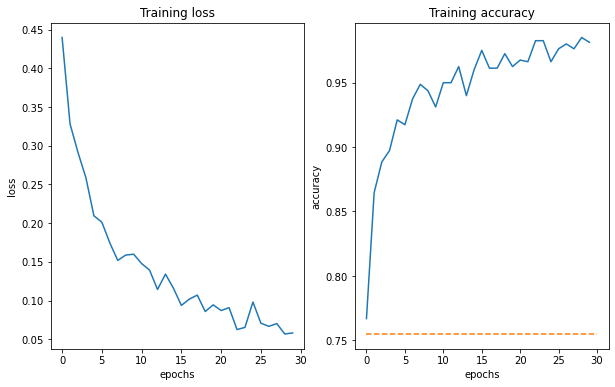

In [26]:
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = np.arange(30)

constant_pred = accuracy_score(y_test, np.ones(y_test.shape))

fig, axs = plt.subplots(1, 2, figsize=(10,6))

axs[0].plot(epochs, loss)
axs[0].set_title('Training loss')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('loss')

axs[1].plot(epochs, accuracy)
axs[1].plot([0, 30], [constant_pred, constant_pred], '--')
axs[1].set_title('Training accuracy')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('accuracy')

In [27]:
predictions = model.predict(x_test)
predictions = predictions > 0.5
predictions = predictions.astype('int8')
accuracy_score(y_test, predictions)

0.91

In [28]:
confusion_matrix(y_test, predictions)

array([[ 31,  18],
       [  0, 151]], dtype=int64)